# Phase 2 : Applying Machine Learning Models

## Chossing the Classification based ML Models

 - Naive Bayes: Naive Bayes is a simple probabilistic classification algorithm based on Bayes' theorem. It is widely used for text classification and other problems with high-dimensional feature spaces. Despite its simplicity, Naive Bayes can perform well on certain types of datasets.

 - Logistic Regression: Logistic Regression is a widely used classification algorithm that is suitable for binary classification problems. It models the probability of a binary outcome by fitting a logistic function to the input features. It is easy to implement, interpretable, and serves as a good baseline model for many classification tasks.

 - K-Nearest Neighbours (KNN): K-Nearest Neighbours is a non-parametric classification algorithm that classifies data points based on the majority class of their K nearest neighbors. It doesn't require training and is easy to understand, making it suitable for small to medium-sized datasets. However, its computational cost increases with the number of data points.

 - Support Vector Machine (SVM): Support Vector Machine is a powerful and versatile classification algorithm that finds an optimal hyperplane to separate data points of different classes. It can handle both linear and non-linear classification tasks and is effective in high-dimensional spaces. SVM is widely used in various domains, including image recognition and text classification.

 - Decision Tree: Decision Tree is a tree-based classification algorithm that recursively splits the dataset based on the features to create a tree-like structure. It is easy to interpret, can handle both numerical and categorical data, and can capture non-linear relationships. However, it is prone to overfitting, especially on deep trees.

 - Random Forest: Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions to make more accurate and robust predictions. It reduces overfitting by aggregating the predictions of different trees. Random Forest is suitable for a wide range of classification tasks and works well with high-dimensional data.

 - XGBOOST: XGBOOST (Extreme Gradient Boosting) is a gradient boosting algorithm known for its high performance and efficiency. It builds an ensemble of weak learners (typically decision trees) and optimizes a loss function to improve prediction accuracy. XGBOOST has become popular in machine learning competitions and real-world applications due to its speed and effectiveness.

### Importing libraries, including sklearn algorithms

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# from sklearn.cluster import KMeans
# import tensorflow as tf
# from tensorflow import keras


### Some required python packages

In [84]:
# !pip install scikit-learn
# !pip install xgboost
# !pip install tensorflow

### Using scaled dataset 

In [85]:
current_dir = os.getcwd()
#defining current directory so that any developer can run the full notebook with any File not found error
dataset_dir = os.path.join(current_dir, '..', '..', 'Dataset')
file_path = os.path.join(dataset_dir, 'stride_features_scaled.csv') #dataframe with identified features
Stridedf = pd.read_csv(file_path)
df=Stridedf.copy()
df

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Interaction_CustomerRating_Discount,Interaction_CustomerCalls_Rating,Total_interactions,Expected_delivery_time,...,Shipping_speed_encoded,ProductImportance_avg_delivery_encoded,ShippingMode_avg_delivery_encoded,Product_importance_and_delivery_time_encoded,Weight_category_encoded,Discount_category_encoded,Customer_Loyalty_encoded,Customer_Satisfaction_Score_encoded,Delivery_Time_per_Weight_encoded,Reached.on.Time_Y.N
0,-0.047711,-0.700755,-0.690722,-0.372735,1.889983,-1.468240,0.848439,-0.599095,-0.301735,-1.760714,...,-1.299241,0.548034,1.760714,-1.052780,0.507289,-1.914940,0.641639,-0.390888,-0.717531,1
1,-0.047711,1.421578,0.120746,-1.029424,2.815636,-0.333893,4.501367,1.135426,-0.786795,-1.760714,...,-0.400729,0.548034,1.760714,-1.052780,1.842779,-1.914940,-0.890910,1.606036,1.269817,1
2,-1.799887,-0.700755,-0.565881,0.283954,2.136824,-0.159002,0.989615,-1.177268,-0.786795,-1.760714,...,1.267319,0.548034,1.760714,-1.052780,1.842779,-1.914940,0.641639,-0.390888,1.292583,1
3,-0.923799,0.006689,-0.711529,0.283954,-0.208162,-1.502484,-0.175087,-0.454551,-0.301735,-1.760714,...,-1.058611,-1.035735,1.760714,-0.006090,0.507289,0.144753,0.641639,0.274753,-0.763062,1
4,-1.799887,-0.700755,-0.545074,-0.372735,2.013404,-0.703244,0.919027,-1.177268,-1.271855,-1.760714,...,0.611842,-1.035735,1.760714,-0.006090,1.842779,-1.914940,0.641639,-0.390888,0.716682,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,-0.047711,-1.408199,0.869792,0.940643,-0.763553,-1.281730,-0.686850,-1.177268,0.668385,0.002726,...,-1.080268,-1.035735,-0.002726,-0.006090,0.507289,0.144753,0.641639,-1.056529,-1.210369,1
10995,-0.047711,-1.408199,0.453655,0.940643,-0.455002,-1.459679,-0.598615,-1.177268,0.668385,0.002726,...,-1.287209,-1.035735,-0.002726,1.040599,0.507289,0.144753,0.641639,-1.722171,-1.412180,0
10996,0.828377,0.714133,0.661724,0.940643,-0.578423,-1.515937,-0.422145,1.135426,1.153446,0.002726,...,-1.567303,0.548034,-0.002726,1.040599,0.507289,0.144753,0.641639,0.274753,-1.488475,0
10997,0.828377,-0.700755,0.266394,1.597332,-0.701843,-1.482304,-0.633909,-0.310008,1.638506,0.002726,...,-1.534577,-1.035735,-0.002726,1.040599,0.507289,0.144753,-2.423459,-1.056529,-1.444175,0


### Checking the correlation 

In [86]:
#checking the correlation of sclaed dataframe with respect to Reached.on.Time_Y.N
correlation_with_new_features = df.corrwith(df['Reached.on.Time_Y.N']).reset_index()
correlation_with_new_features.columns = ['Features', 'Correlation with Reached.on.Time_Y.N']
correlation_with_new_features =  correlation_with_new_features.sort_values(by='Correlation with Reached.on.Time_Y.N', ascending=True)
correlation_with_new_features

,Features,Correlation with Reached.on.Time_Y.N
24,Product_importance_and_delivery_time_encoded,-0.855516
5,Weight_in_gms,-0.268793
14,Product_Value,-0.239417
29,Delivery_Time_per_Weight_encoded,-0.221003
21,Shipping_speed_encoded,-0.202709
26,Discount_category_encoded,-0.119007
8,Total_interactions,-0.078171
2,Cost_of_the_Product,-0.073587
0,Customer_care_calls,-0.067126
3,Prior_purchases,-0.055515


### Plotting the graph of correlation

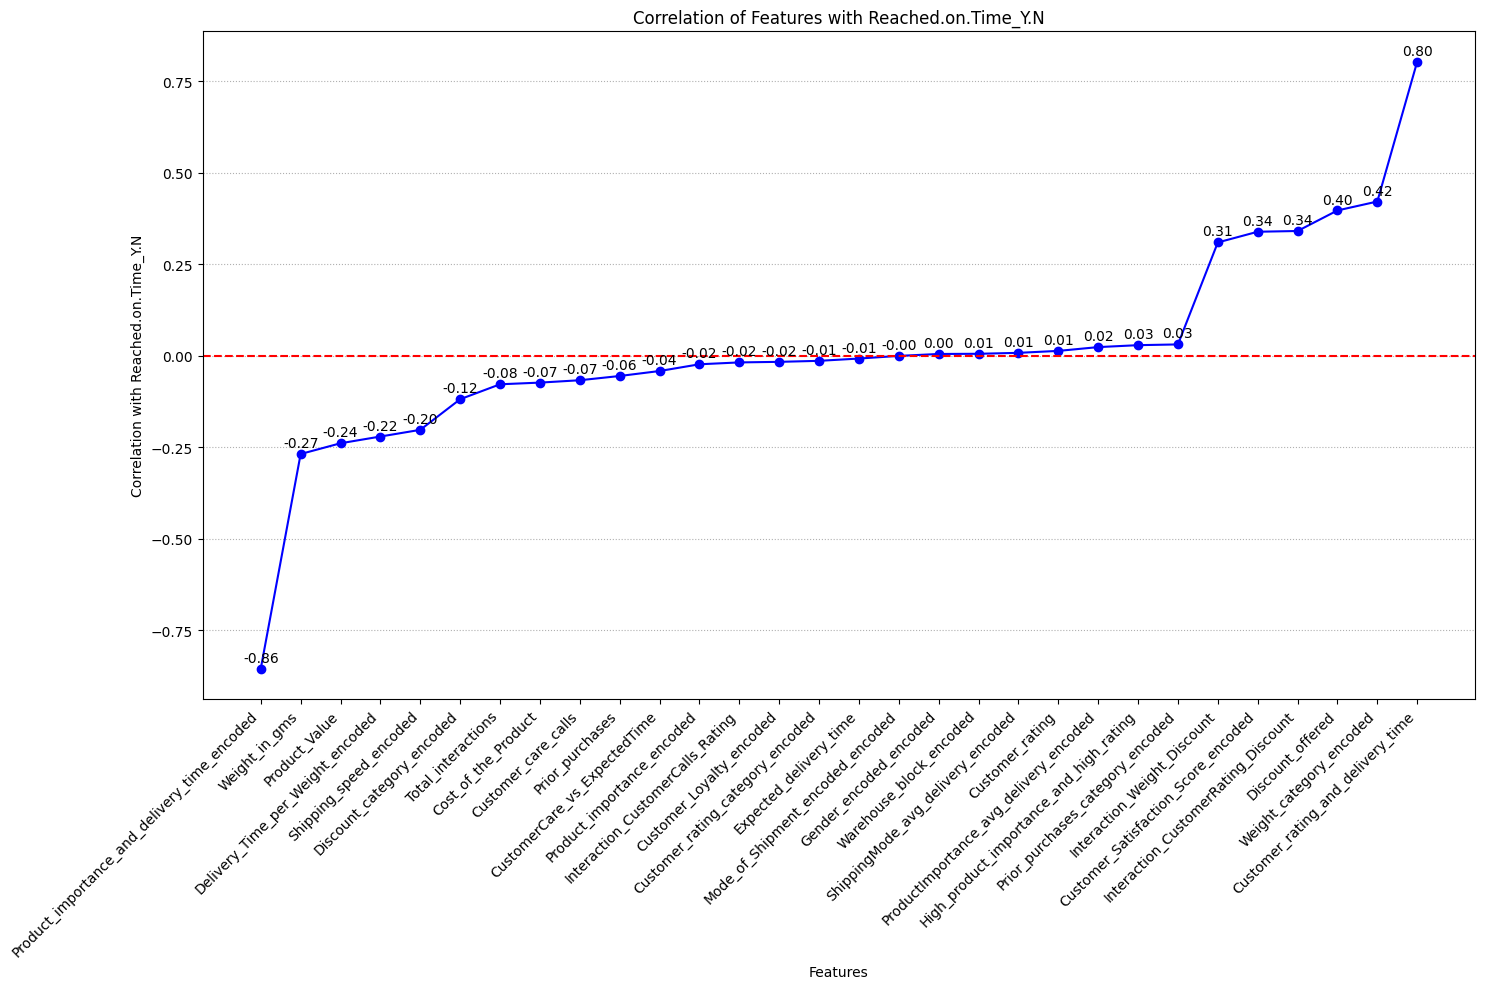

In [87]:
correlation_with_new_features = correlation_with_new_features.sort_values(by='Correlation with Reached.on.Time_Y.N', ascending=True)
correlation_with_new_features = correlation_with_new_features[correlation_with_new_features['Features'] != 'Reached.on.Time_Y.N']
correlation_with_new_features = correlation_with_new_features.reset_index(drop=True)

plt.figure(figsize=(15, 10))
plt.plot(correlation_with_new_features['Features'], correlation_with_new_features['Correlation with Reached.on.Time_Y.N'], marker='o', color='b')
plt.axhline(y=0, color='r', linestyle='dashed', linewidth=1.5)
plt.xlabel('Features')
plt.ylabel('Correlation with Reached.on.Time_Y.N')
plt.title('Correlation of Features with Reached.on.Time_Y.N')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='dotted')
plt.tight_layout()

for i in range(len(correlation_with_new_features)):
    plt.annotate(f"{correlation_with_new_features['Correlation with Reached.on.Time_Y.N'][i]:.2f}",
                 (correlation_with_new_features['Features'][i], correlation_with_new_features['Correlation with Reached.on.Time_Y.N'][i]),
                 textcoords="offset points",
                 xytext=(0, 5),
                 ha='center')

plt.show()

### Selecting Important and relevant features

Given Columns in the dataset : \
['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance',  'Gender',  'Discount_offered',    'Weight_in_gms']

Correlation is only effective with given columns : \
['Discount_offered',    'Weight_in_gms']

New Added(relevant) Features  : \
['Interaction_Weight_Discount', 'Customer_Satisfaction_Score_encoded', 'Interaction_CustomerRating_Discount', 'Discount_offered', 'Weight_category_encoded', 'Weight_in_gms', 'Delivery_Time_per_Weight_encoded', 'Shipping_speed_encoded', 'Discount_category_encoded']







In [88]:
# ind_features = ['Interaction_Weight_Discount', 'Customer_Satisfaction_Score_encoded', 'Interaction_CustomerRating_Discount', 'Discount_offered', 'Weight_category_encoded', 'Customer_rating_and_delivery_time', 'Product_importance_and_delivery_time_encoded', 'Weight_in_gms', 'Delivery_Time_per_Weight_encoded', 'Shipping_speed_encoded', 'Discount_category_encoded']
# target = 'Reached.on.Time_Y.N'

selected_features = ['Interaction_Weight_Discount', 'Customer_Satisfaction_Score_encoded', 'Interaction_CustomerRating_Discount', 'Discount_offered', 'Weight_category_encoded', 'Weight_in_gms', 'Delivery_Time_per_Weight_encoded', 'Shipping_speed_encoded', 'Discount_category_encoded']
target = 'Reached.on.Time_Y.N'

#### Customized Generic Function to train and run the classification model from the list. 
This functions takes the input as any dataframe, list of features and target variable to train the model.
It not only train but also plots the confusion matrix, classification report and ROC curve for better understanding of the model

In [89]:
def run_machine_learning(model_name, df, selected_features, target):
    # Split the data into features (X) and target (y), here we are passing required features to train
    X = df[selected_features]
    y = df[target]

    # Split the data into training and testing sets to build the model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the selected model, here any one model will run at a time.
    if model_name == 'Naive Bayes':
        model = GaussianNB()
    elif model_name == 'Logistic Regression':
        model = LogisticRegression()
    elif model_name == 'K-Nearest Neighbours':
        model = KNeighborsClassifier()
    elif model_name == 'Support Vector Machine':
        model = SVC(probability=True)  # Set probability=True to enable ROC curve and to get rid of error: predict_proba not found
    elif model_name == 'Decision Tree':
        model = DecisionTreeClassifier()
    elif model_name == 'Random Forest':
        model = RandomForestClassifier()
    elif model_name == 'XGBOOST':
        model = XGBClassifier()
    else:
        raise ValueError("Invalid model name. Please choose from the available models.")

    # Fit the model to the training data using selected featres
    model.fit(X_train, y_train)

    # Make predictions on the test data usinf selected features
    y_pred = model.predict(X_test)
   
    # Calculate the accuracy score of a specific model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy of {model_name} model is {accuracy*100}')

    # Generate a confusion matrix of a specific model
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix of {model_name}')
    plt.show()

    # Display the classification report of a specific model
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)


    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class (class 1) for ROC curve
        roc_auc = roc_auc_score(y_test, y_prob)

        # Plot the ROC curve for a specific model
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve of {model_name}')
        plt.legend(loc='lower right')
        plt.show()

    print("-------------------------------------------------------------------------------------------")
    print("\n")
    return accuracy


Accuracy of Naive Bayes model is 64.72727272727272


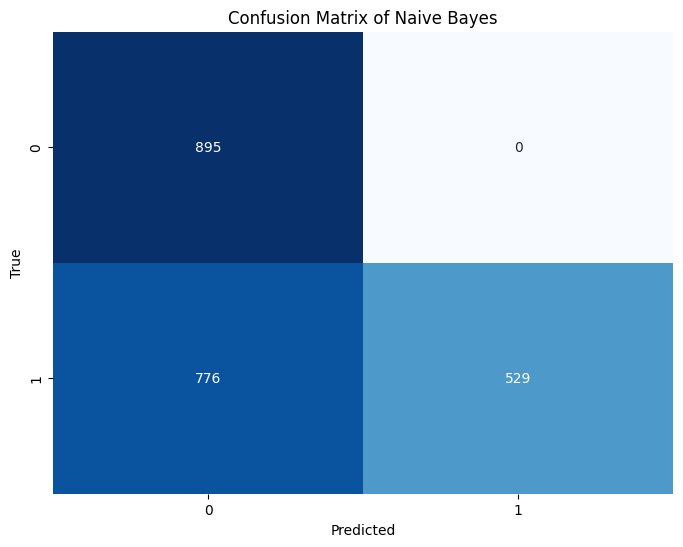

Classification Report:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       895
           1       1.00      0.41      0.58      1305

    accuracy                           0.65      2200
   macro avg       0.77      0.70      0.64      2200
weighted avg       0.81      0.65      0.63      2200



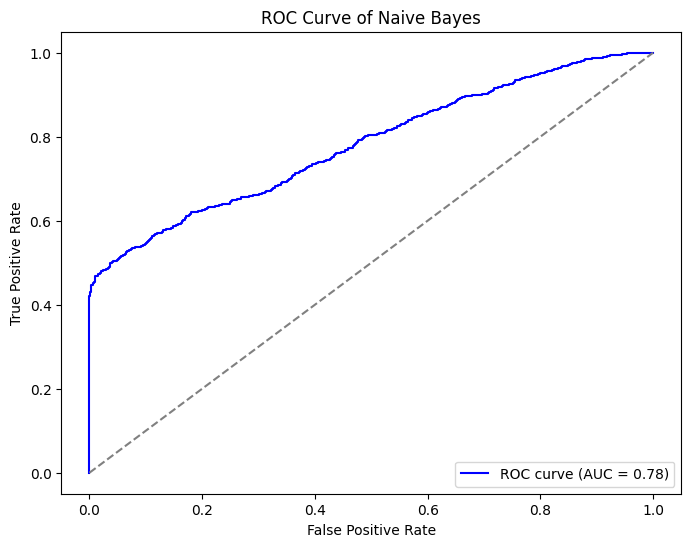

-------------------------------------------------------------------------------------------


Accuracy of Logistic Regression model is 82.86363636363636


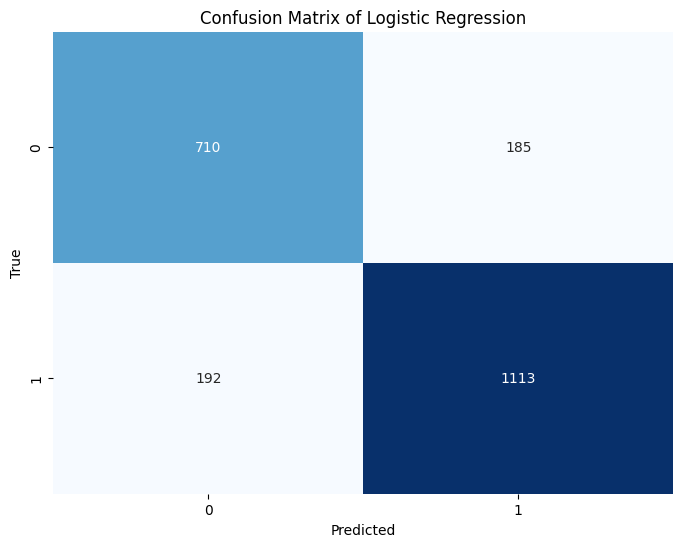

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       895
           1       0.86      0.85      0.86      1305

    accuracy                           0.83      2200
   macro avg       0.82      0.82      0.82      2200
weighted avg       0.83      0.83      0.83      2200



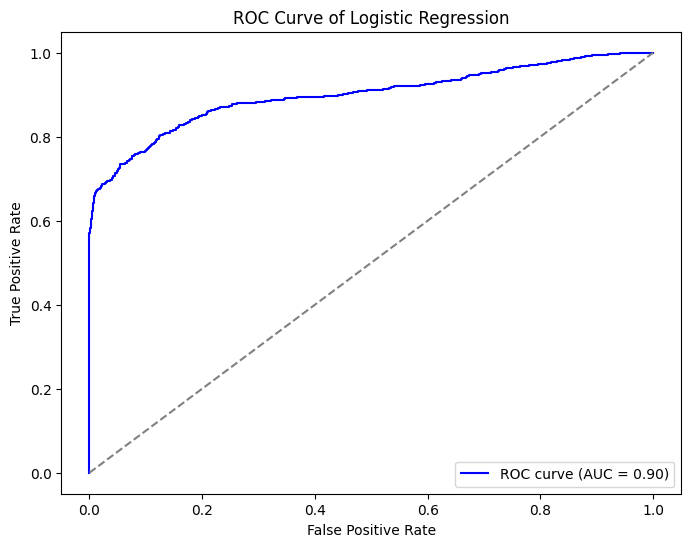

-------------------------------------------------------------------------------------------


Accuracy of K-Nearest Neighbours model is 80.0909090909091


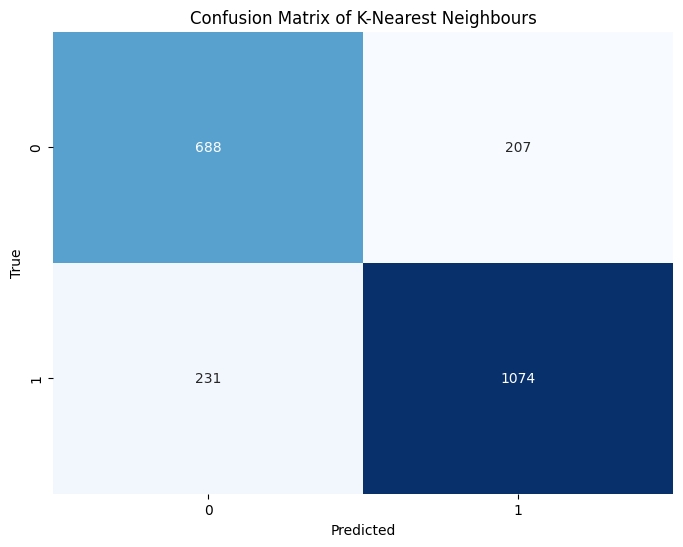

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       895
           1       0.84      0.82      0.83      1305

    accuracy                           0.80      2200
   macro avg       0.79      0.80      0.79      2200
weighted avg       0.80      0.80      0.80      2200



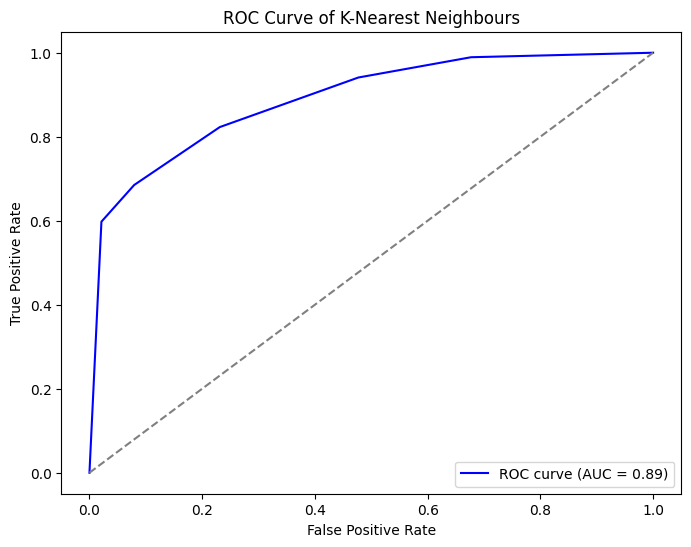

-------------------------------------------------------------------------------------------


Accuracy of Support Vector Machine model is 93.5


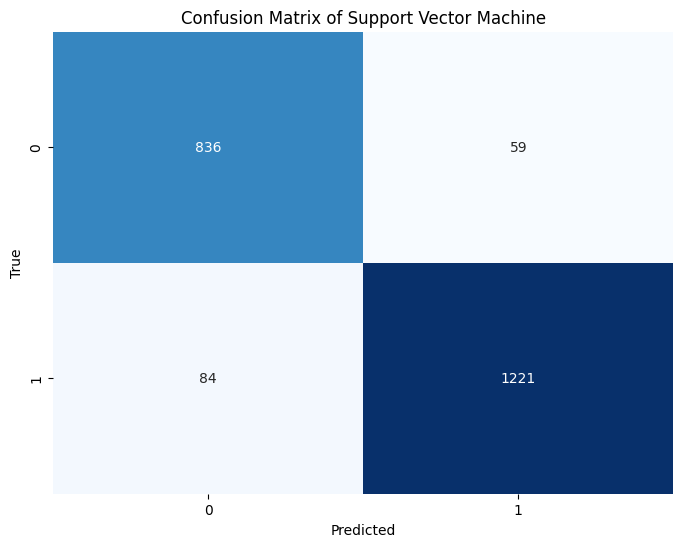

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       895
           1       0.95      0.94      0.94      1305

    accuracy                           0.94      2200
   macro avg       0.93      0.93      0.93      2200
weighted avg       0.94      0.94      0.94      2200



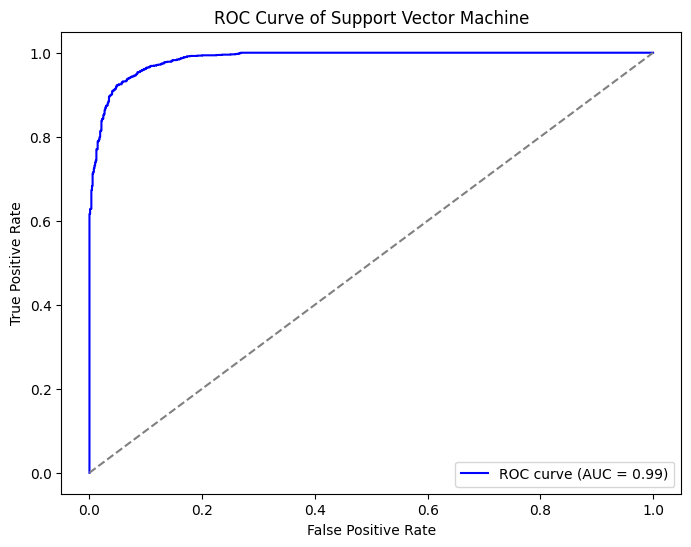

-------------------------------------------------------------------------------------------


Accuracy of Decision Tree model is 100.0


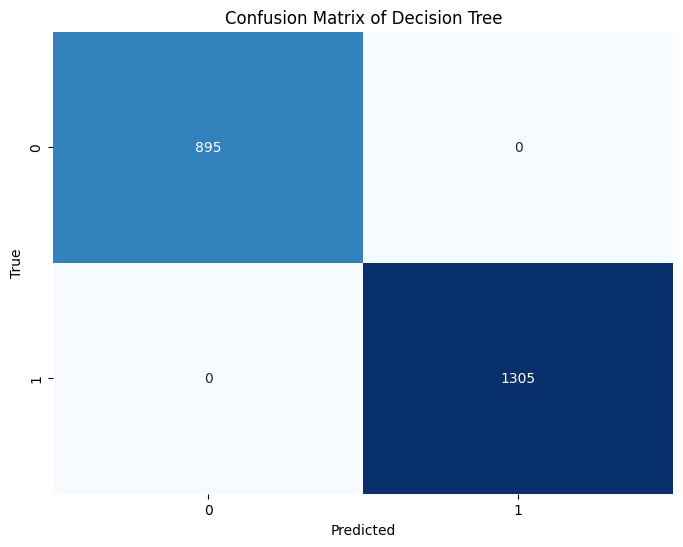

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       895
           1       1.00      1.00      1.00      1305

    accuracy                           1.00      2200
   macro avg       1.00      1.00      1.00      2200
weighted avg       1.00      1.00      1.00      2200



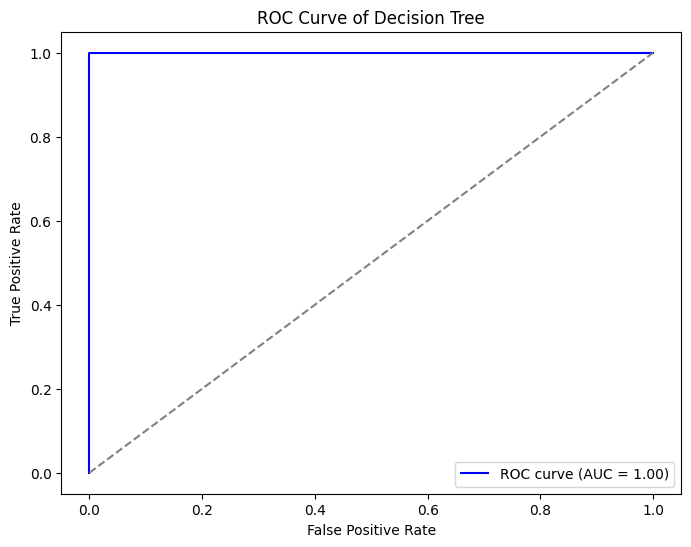

-------------------------------------------------------------------------------------------


Accuracy of Random Forest model is 98.54545454545455


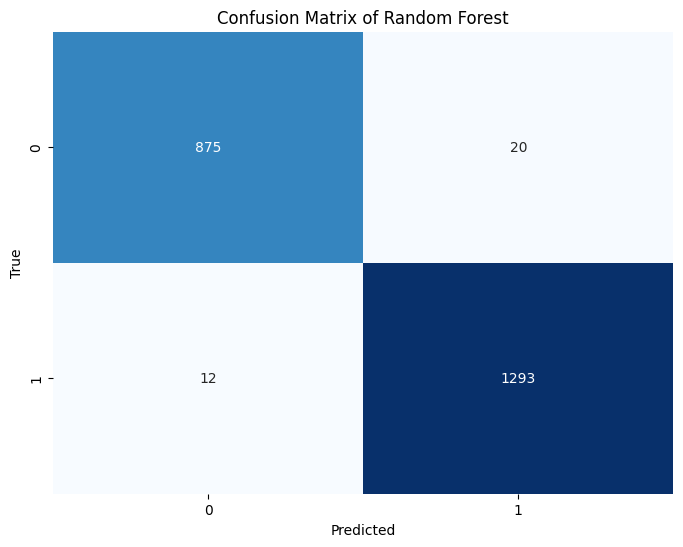

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       895
           1       0.98      0.99      0.99      1305

    accuracy                           0.99      2200
   macro avg       0.99      0.98      0.98      2200
weighted avg       0.99      0.99      0.99      2200



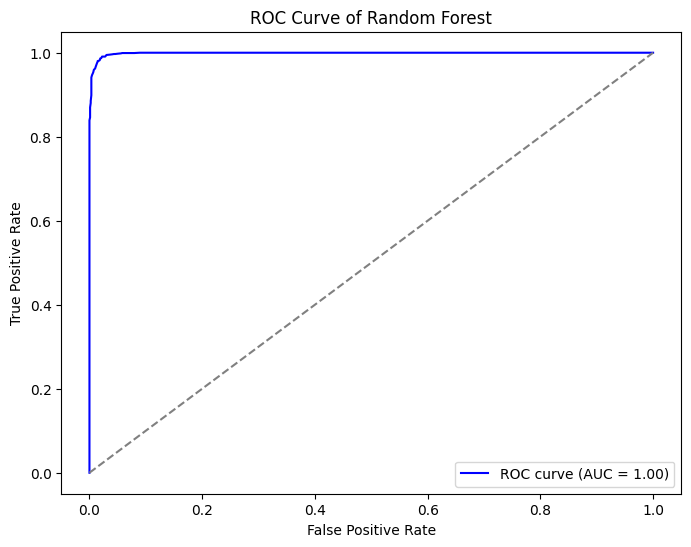

-------------------------------------------------------------------------------------------


Accuracy of XGBOOST model is 100.0


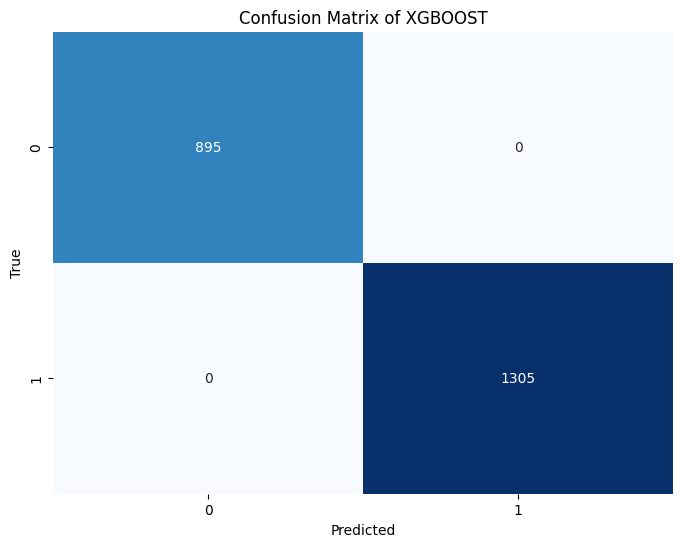

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       895
           1       1.00      1.00      1.00      1305

    accuracy                           1.00      2200
   macro avg       1.00      1.00      1.00      2200
weighted avg       1.00      1.00      1.00      2200



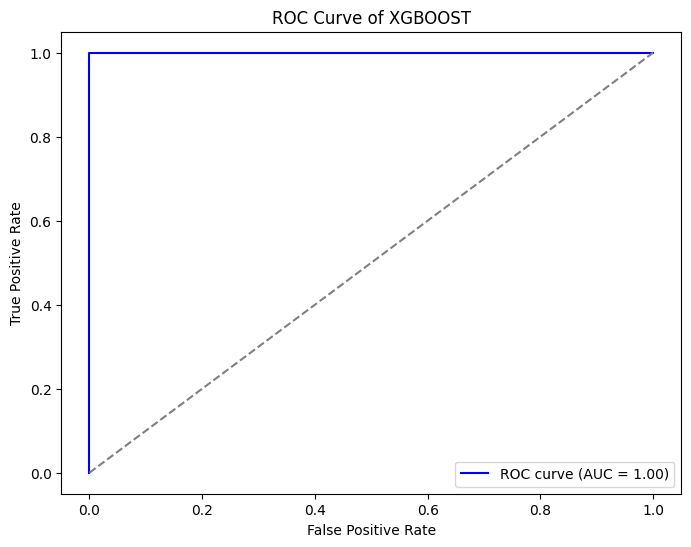

-------------------------------------------------------------------------------------------




In [90]:
# List of classification models
models = ['Naive Bayes', 'Logistic Regression', 'K-Nearest Neighbours', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'XGBOOST']

# Dictionary to store model accuracies
accuracies = {}

for model_name in models:
    accuracy = run_machine_learning(model_name, df, selected_features, target)
    accuracies[model_name] = accuracy

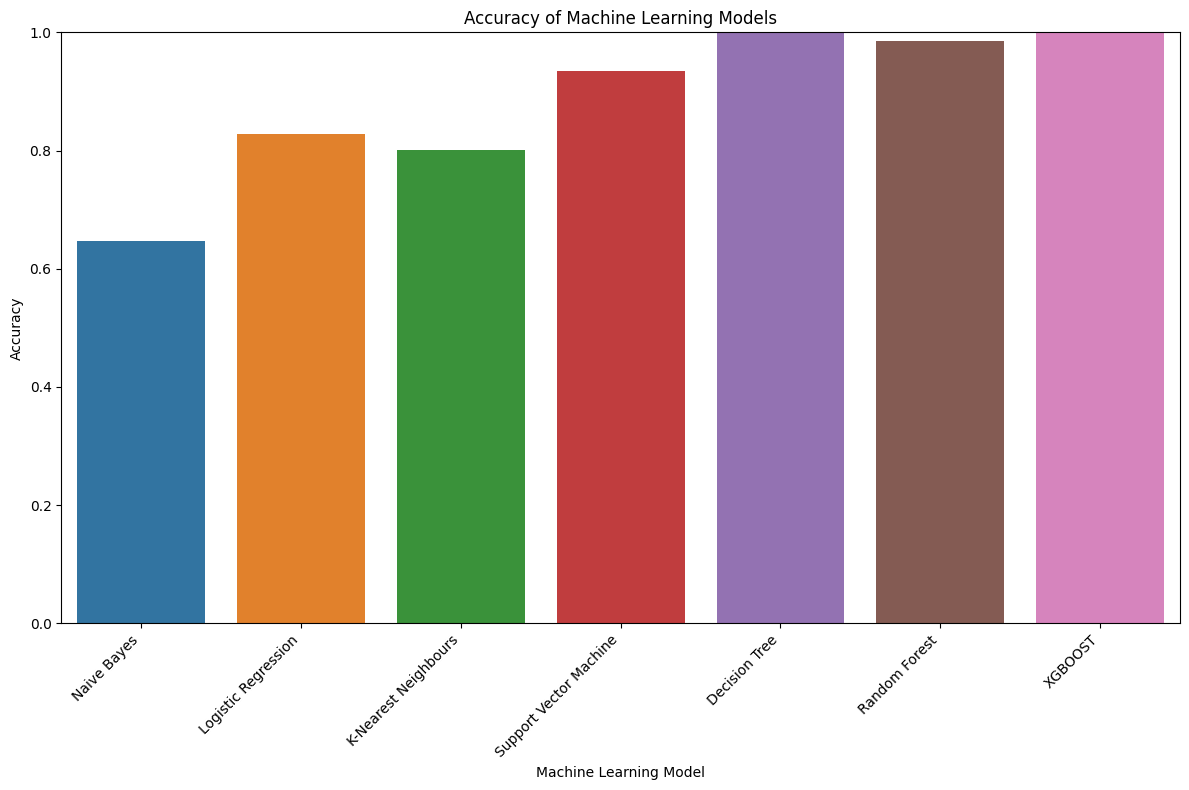

In [91]:
# Plot the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Machine Learning Models')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()